<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#背景" data-toc-modified-id="背景-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>背景</a></span><ul class="toc-item"><li><span><a href="#抽样方法" data-toc-modified-id="抽样方法-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>抽样方法</a></span></li><li><span><a href="#蒙特卡罗原理" data-toc-modified-id="蒙特卡罗原理-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>蒙特卡罗原理</a></span></li><li><span><a href="#Inverse-CDF-方法" data-toc-modified-id="Inverse-CDF-方法-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Inverse CDF 方法</a></span></li><li><span><a href="#接受-拒绝抽样（Acceptance-Rejection-Sampling）" data-toc-modified-id="接受-拒绝抽样（Acceptance-Rejection-Sampling）-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>接受-拒绝抽样（Acceptance-Rejection Sampling）</a></span></li></ul></li><li><span><a href="#蒙特卡罗数值积分" data-toc-modified-id="蒙特卡罗数值积分-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>蒙特卡罗数值积分</a></span><ul class="toc-item"><li><span><a href="#随机投点法" data-toc-modified-id="随机投点法-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>随机投点法</a></span></li><li><span><a href="#期望法" data-toc-modified-id="期望法-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>期望法</a></span></li></ul></li><li><span><a href="#MCMC算法" data-toc-modified-id="MCMC算法-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>MCMC算法</a></span><ul class="toc-item"><li><span><a href="#马尔可夫链" data-toc-modified-id="马尔可夫链-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>马尔可夫链</a></span><ul class="toc-item"><li><span><a href="#离散空间下的马尔可夫链" data-toc-modified-id="离散空间下的马尔可夫链-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>离散空间下的马尔可夫链</a></span></li><li><span><a href="#连续空间下的马尔可夫链" data-toc-modified-id="连续空间下的马尔可夫链-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>连续空间下的马尔可夫链</a></span></li></ul></li><li><span><a href="#Metropolis采样" data-toc-modified-id="Metropolis采样-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Metropolis采样</a></span></li><li><span><a href="#Metropolis-Hasting采样" data-toc-modified-id="Metropolis-Hasting采样-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Metropolis-Hasting采样</a></span></li><li><span><a href="#Gibbs采样" data-toc-modified-id="Gibbs采样-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Gibbs采样</a></span><ul class="toc-item"><li><span><a href="#二维Gibbs采样" data-toc-modified-id="二维Gibbs采样-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>二维Gibbs采样</a></span></li><li><span><a href="#多维Gibbs采样" data-toc-modified-id="多维Gibbs采样-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>多维Gibbs采样</a></span></li><li><span><a href="#Gibbs抽样实例" data-toc-modified-id="Gibbs抽样实例-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>Gibbs抽样实例</a></span></li></ul></li></ul></li><li><span><a href="#参考" data-toc-modified-id="参考-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>参考</a></span></li></ul></div>

# 背景

计算机中常用的随机模拟方法也可以叫做__蒙特卡罗模拟(Monte Carlo Simulation)__，这个方法始于20世纪40年代，与原子弹制造的曼哈顿计划密切相关，在计算机上编程实现统计模拟的方法。随机模拟中一个重要的问题就是__给定一个概率分布，在计算机中生成对应的样本__。MC抽样方法的核心思想：使用随机数（或常见的伪随机数）来解决一些复杂的计算问题。

当所求解问题可以转化为某种随机分布的特征数（比如随机事件出现的概率，或者随机变量的期望值等）时，往往就可以考虑使用蒙特卡洛方法。通过随机抽样的方法，以随机事件出现的频率估计其概率，或者以抽样的数字特征估算随机变量的数字特征，并将其作为问题的解。这种方法多用于求解复杂的高维积分问题。

为了采用代码进行演示，引用方法中需要的包。

In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from random import uniform
from scipy.integrate import quad

## 抽样方法

实际应用中，我们所要面对的第一个问题就是如何抽样？在统计学中， 抽样（或称采样）是指从目标总体中抽取一部分个体作为样本的过程。
> 例如，我们想知道一所大学里所有男生的平均身高。但是因为学校里的男生可能有上万人之多，所以为每个人都测量一下身高可能存在困难，于是我们从每个学院随机挑选出100名男生来作为样本，这个过程就是抽样。

但是在计算机模拟时，我们所说的抽样，其实是指__从一个概率分布中生成观察值（observations）的方法__。而这个分布通常是由其概率密度函数（PDF）来表示的。而且，即使在已知PDF的情况下，让计算机自动生成观测值也不是一件容易的事情。从本质上来说，计算机只能实现对均匀分布（Uniform distribution）的采样。具体来说，我们可能要面对的问题包括：

> - 计算机只能实现对均匀分布的采样，但我们仍然可以在此基础上对更为复杂的分布进行采样，那具体该如何操作呢？
> - 随机分布的某些数字特征可能需要通过积分的形式来求解，但是某些积分可能没有（或者很难求得）解析解，这里我们该如何处理呢？
> - 在贝叶斯推断中，后验概率的分布是正⽐于先验和似然函数之积的，但是先验和似然函数的乘积形式可能相对复杂，我们又该如何对这种形式复杂的分布进行采样呢？

另一方面，计算机本身是无法生成真正的随机数，但可以根据一定的算法生成伪随机数（Pseudo-random Number）。最早最简单的方法莫过于线性同余发生器（Linear Congruential Generator）：
$$
    x_{n+1}=(ax_n+c)\ mod\ m
$$
公式中a和c是一些数字知识推导出的适合常数。但是这种算法产生的下一个随机数完全依赖于现在的随机数大小，而且在随机数序列非常大的时候，随机数将出现重复子序列的情况。但是不管算法如何发展，这些都不是本质上的随机数，用冯诺依曼的一句话说就是：
> Anyone who considers arithmetic methods of producing random digits is, of course, in a state of sin.

MCMC抽样可解决高维空间里的积分和优化问题：
- 生成一些复杂分布的样本数据；
- 求解某些无法直接求积分的函数；
- 对一个分布进行高效快速的模拟，以便于抽样；
- 在可行域很大时有效找到最优解—RBM 优化目标函数中的问题；
- 在众多模型中快速找到更好的模型—MDL, BIC, AIC 模型选择问题。

## 蒙特卡罗原理
MC抽样可以计算随机变量的期望值：X表示随即变量，服从概率分布$p(x)$, 那么要计算$f(x)$的期望，只需要我们不停从$p(x)$中抽样$x_i$，然后对这些$f(x_i)$取平均即可近似$f(x)$的期望。即：
$$
    E_N(f)=\frac{1}{N}\sum_{i=1}^N{f(x_i)}
$$
![mc sampling expection value](https://raw.githubusercontent.com/qikunlun/ML-course/master/images/mc-expval.jpg)

当抽样次数足够时，就非常接近真实值：
$$
    \lim_{N\to \infty}E_N(f)=\sum_x{f(x)p(x)}
$$

MC抽样的方法一个重要的好处是：估计值的精度与 x 的维度无关（维度越高，每次抽样获得的信息也越多），而是与抽样次数有关。在实际问题中一般抽样二十次左右就能达到比较好的精度。但是，当我们实际动手的时候，就会发现一个问题，即：如何从分布 p(x) 中抽取随机样本。在很多实际问题中，$p(x)$是很难直接采样的，因此，我们需要借助其他的方法进行采样。

## Inverse CDF 方法
比较简单的一种情况是，我们可以通过概率密度函数（probability density function, PDF）与累积分布函数（CDF，Cumulative Distribution Function）之间的关系，求出相应的CDF。或者我们根本就不知道PDF，但是知道CDF，此时就可以使用Inverse CDF的方法来进行采样。这种方法又称为逆变换采样（Inverse transform sampling）。如果你对PDF和CDF的概念有点模糊，可以先回顾一下，这里有一个简单解释[在连续随机变量中，概率密度函数（PDF）、概率分布函数、累积分布函数（CDF）之间的关系是什么？ - 汪轲的回答 - 知乎](https://www.zhihu.com/question/36853661/answer/69775009)。

通常我们可以通过对PDF进行积分来求解概率分布的CDF，然后再得到CDF的反函数$F^{-1}(u)$。假设你想得到m个观察值，则可以重复以下步骤m次：
- 从Uniform(0,1)中随机生成一个值，并用u表示；
- 计算$F^{-1}(u)$的值x，则x就是从$f(x)$中得出的一个采样点。

我们用一个稍微复杂一点的例子来验证Inverse CDF方法的有效性。假设：
$$
    f(x)=\begin{cases}
        8x & ,if\ 0\leq x \leq 0.25 \\
        \frac{8}{3}-\frac{8}{3}x & ,if\ 0.25\leq x \leq 1 \\
         0 & ,otherwise
        \end{cases}
$$
则其对应的CDF应为
$$
    F(x)=\begin{cases}
        0 & ,if\ x<0 \\
        4x^2 & ,if\ 0\leq x \leq 0.25 \\
        \frac{8}{3}x-\frac{4}{3}x^2-\frac{1}{3} & ,if\ 0.25\leq x \leq 1 \\
         1 & ,if\ x>1
        \end{cases}
$$
对于$u\in [0,1]$，它的反函数为
$$
    F(x)=\begin{cases}
        \frac{\sqrt{u}}{2} & ,if\ 0\leq x \leq 0.25 \\
        1-\frac{\sqrt{3(1-u)}}{2} & ,if\ 0.25\leq x \leq 1
        \end{cases}
$$ 

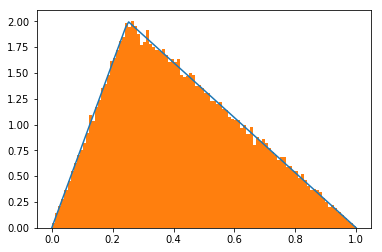

In [175]:
count = 100000
def invcdf(u):
    if u >= 0. and u < 0.25:
        return np.sqrt(u)/2.
    elif u >= 0.25 and u <= 1:
        return 1-np.sqrt(3.*(1-u))/2.
def func(u):
    if u >= 0 and u < 0.25:
        return u * 8.
    elif u >= 0.25 and u <= 1:
        return 8./3.-u * 8./3.
    
u = [invcdf(random.uniform(0,1)) for i in range(count)]
y = [func(i) for i in np.linspace(0,1,100)]
plt.plot(np.linspace(0,1,100), y)
plt.hist(u, 100, normed=1.0)
plt.show()

## 接受-拒绝抽样（Acceptance-Rejection Sampling）
Inverse CDF方法确实有效，但它的缺点也是很明显的，因为有些分布的 CDF 可能很难通过对 PDF 的积分得到，或者 CDF 的反函数不容易求出。这时我们可能需要用到接受-拒绝采样。

接受-拒绝采样实际上采用的是一种迂回（Proposal Distribubtion）的策略。既然$p(x)$太复杂导致其在程序中无法直接采样，那么我可以设定一个程序中可抽样的分布$q(x)$（比如高斯分布或者Inverse CDF可以抽样的分布），然后按照一定的方法拒绝某些样本，达到接近$p(x)$分布的目的，这里的q(x)叫做Proposal Distribution。下图很地阐释了拒绝采样的基本思想，我们将$q(x)$与一个常数K相乘之后，可以实现下图所示的关系，即$K\dot q(x)$能够将$p(x)$完全罩住。
![Acceptance-Rejection sampling](https://raw.githubusercontent.com/qikunlun/ML-course/master/images/ar-sampling.jpg)
设定一个方便抽样的函数 q(x)，以及一个常量 K，重复如下步骤，直到获得m个被接受的采样点：
> - x轴方向：从$q(x)$分布抽样得到$x(i)$；
> - y轴方向：从均匀分布$(0,1)$中随机生成一个值，用u表示；
> - 对于$x_i$计算接受概率：$\alpha=\frac{p(x_i)}{Kq(x_i)}$
> - 如果$\alpha\geq u$，则接受$x_i$作为一个来自$p(x)$的采样值，否则拒绝本次抽样并回到第一步

你当然可以采用严密的数学推导来证明Reject Sampling的可行性。它的原理从直观上来也比较容易理解的，你可以想象在上图的例子中，从哪些位置抽出的点会比较容易被接受：显然，红色曲线和绿色曲线所示之函数更加接近的地方接受概率较高，也即是更容易被接受，所以在这样的地方采到的点就会比较多；而在接受概率较低（即两个函数差距较大）的地方采到的点就会比较少，这也就保证了这个方法的有效性。

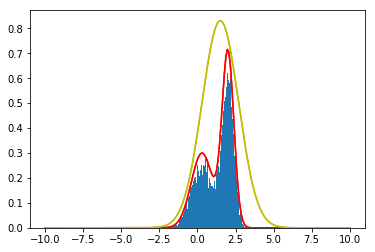

In [178]:
def qsample(mu, sigma):
    return random.gauss(mu, sigma)

def p(x):
    return 0.3*np.exp(-(x-0.3)**2) + 0.7* np.exp(-(x-2.)**2/0.3) 

def reject_sample(nsamples, mu, sigma, K):
    samples = np.zeros(nsamples,dtype=float)
    for i in range(nsamples):
        while True:
            xi = qsample(mu, sigma)
            u = random.uniform(0, 1)
            alpha = p(xi)/(K*stats.norm.pdf(xi,mu,sigma))
            if alpha >= u:
                samples[i] = xi
                break
    return samples

K = 2.5
mu,sigma = 1.5, 1.2
x = np.linspace(-10.0, 10.0, 200)
plt.plot(x, p(x), 'r')
plt.plot(x, K*stats.norm.pdf(x, mu, sigma), 'y')
samples = reject_sample(10000, mu, sigma, K)
plt.hist(samples, 100, normed=1.0)
plt.show()

显然，在高维的情况下，Rejection Sampling 会出现两个问题：
- 第一是合适的q分布比较难以找到；
- 第二是很难确定一个合理的k值。

这两个问题会导致拒绝率很高，增加无用计算。  

# 蒙特卡罗数值积分
假设计算$f(x)$的积分$\int_a^b f(x) d(x)$，但是$f(x)$的形式可能比较复杂，其积分不好计算，则可以通过数值解法来求近似的积分结果。假设$0<f(x)<1$,用蒙特卡罗模拟法求解定积分$J=\int_0^1 f(x)d(x)$的值。

## 随机投点法
假设$(X,Y)$服从正方形${0\leq x\leq 1,0\leq y\leq 1}$，则$X,Y$分别服从$[0,1]$上的均匀分布，且$X,Y$相互独立。记事件$A={Y\leq f(X)}$，则事件A的概率为$P(A)=P(Y\leq f(X)=\int_0^1 \int_0^{f(x)} dydx=\int_0^1 f(x)dx=J$，即定积分J的值就是A事件出现的概率。  
由伯努利大数定律可知，我们可以用重复试验中A出现的频率作为事件A的概率估计值。即将$(X,Y)$看成正方形${0\leq x\leq 1,0\leq y\leq 1}$内的随机投点，用随机点落在区域$y\leq f(x)$中的频率作为定积分的近似值。这种方法就叫__随机投点法__。
1. 首先产生服从$[0,1]$上的均匀分布的2n个随机数（n为随机投点个数，n越大估计值越准确），将两者进行配对。
2. 这n对数据$(x_i,y_i),i=1,2,...,n$，记录满足不等式$y_i\leq f(x_i)$的个数，也就是事件A发生的频数$\mu$，由此可以计算事件A发生的频率$\mu/n$，即$J=\mu/n$。

举一实例，譬如要计算$\int_0^1 e^{-x^2/2}/\sqrt{2\pi}dx$，模拟次数$n=10^4$。 

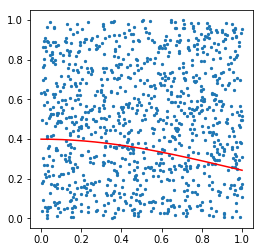

simulate integral value=0.313000 while counts=1.00e+03
simulate integral value=0.346700 while counts=1.00e+04
simulate integral value=0.341490 while counts=1.00e+05
simulate integral value=0.341570 while counts=1.00e+06
simulate integral value=0.341424 while counts=1.00e+07
real integral value= (0.341344746068543, 3.789687964201238e-15)


In [52]:
def simulate(count, func, showfig=False):
    x = [uniform(0,1) for i in range(int(count))]
    y = [uniform(0,1) for i in range(int(count))]
    if showfig:
        px = np.linspace(0,1,1000)
        py = func(px)
        plt.figure(figsize=(4,4))
        plt.plot(px, py, color='r')
        plt.scatter(x, y, s=5)
        plt.show()
    return np.sum(np.array(y) < func(np.array(x)))/count

def func(x):
    return np.exp(-x**2.0/2.0)/math.sqrt(2*math.pi)

simulate(1e3, func, True)

counts = [1e3,1e4,1e5,1e6,1e7]
for cnt in counts:
    print('simulate integral value=%f while counts=%.2e' % (simulate(cnt, func),cnt))

inputx = symbols('inputx', positive=True)
print('real integral value=', quad(func,0,1))

__Note:__显然方法适合于积分区间$[0,1]$且积分函数$f(x)$值阈也在区间$[0,1]$的情况。对于一般的积分函数$J^\prime=\int_a^b g(x)dx$，可以通过建立$J$和$J^\prime$之间的线性变换关系解决。  
1. 做线性变换，令$y=(x-a)/(b-a)$，即$x=(b-a)y+a$，则$J^\prime=(b-a)\int_0^1 g[(b-a)y+a] dy$；
2. 假设函数$g(x)$在区间$[a,b]$上有$c\leq g(x)\leq d$，令$f(y)=\frac{g(x)-c}{d-c}=\frac{g[(b-a)y+a]-c}{d-c}$，则$0\leq f(x)\leq 1$；
3. 由此可得，$J^\prime=\int_a^b g(x)dx=(b-a)(d-c)\int_0^1 f(x)dx+c(b-a)$。  
举一实例，譬如要计算$\int_2^5 e^{-x^2/2}/\sqrt{2\pi}dx$的积分。显然$a=2,b=5$，$c=min{g(x)|2\leq x\leq 5},d=max{g(x)|2\leq x\leq 5}$，由于$g(x)$在$[2,5]$上单调递减，所以$c=g(5),d=g(2)$

In [50]:
a,b=2,5
c,d=func(5),func(2)
s = (b-a)*(d-c)
t = c*(b-a)

def func_f(x):
    return (func((b-a)*x+a)-c)/(d-c)

counts = [1e3,1e4,1e5,1e6,1e7]
for cnt in counts:
    print('simulate integral value=%f while counts=%.2e' % (s*simulate(cnt, func_f)+t,cnt))

inputx = symbols('inputx', positive=True)
print('real integral value=', quad(func,2,5))

simulate integral value=0.023490 while counts=1.00e+03
simulate integral value=0.022081 while counts=1.00e+04
simulate integral value=0.022714 while counts=1.00e+05
simulate integral value=0.022832 while counts=1.00e+06
simulate integral value=0.022735 while counts=1.00e+07
real integral value= (0.02274984529660733, 2.525740205495378e-16)


## 期望法
蒙特卡罗模拟法计算定积分还有一种方法叫__期望法__（也称平均值法）。

任取一组相互独立、同分布的随机变量${X_i}$，$X_i$在$[a,b]$上服从分布律$f_X$，也就是说$f_X$是随机变量X的PDF（或PMF），令$g^*(x)=\frac{g(x)}{f_X(x)}$，则$g^*(x)$也是一组独立同分布的随机变量，而且$E(g^*(X_i))=\int_a^b g^*(x)f_X(x)dx=\int_a^b g(x)dx=I$。  
由__辛钦大数定律__可知，$P_r(\lim_{x\to \infty}{\frac{1}{N}\sum_{i=1}^N g^*(X_i)=I)}=1$，假设$\bar{I}=\frac{1}{N}\sum_{i=1}^N g^*(X_i)$，则$\bar{I}$依概率1收敛到$I$，而期望法就是用$\bar{I}$的期望值作为$I$的近似值。


假设计算$\int_a^b g(x)dx$，其中$g(x)$在区间$[a,b]$内可积。任意选择一个方便进行抽样的概率密度函数$f_X(x)$，使其满足下列条件：
1. 当$g(x)\neq 0$时，$f_X(x)\neq 0 (a\leq x\leq b)$
2. $\int_a^b f_X(x)=1$

假设： 
$\begin{eqnarray}
g^*(x)=\begin{cases}
\frac{g(x)}{f_X(x)} & f_X(x)\neq0 \\
0 & f_X(x) = 0.
\end{cases}\end{eqnarray}$
则原积分$\int_a^b g(x)dx$可以写成$\int_a^b g^*(x)f_X(x)dx$，则求积分的步骤：
1. 生成服务分布律$f_X(x)$的随机变量$X_i(i=1,2,...,N)$；
2. 计算均值$\bar{I}=\frac{1}{N}\sum_{i=1}^N{g^*(X_i})$，并将其做为$I$的近似值。

随机模拟方法的核心就是__如何对一个概率分布得到样本，即抽样（sampling）__。如果a,b为有限值，则$f_X$可取作均匀分布：
$\begin{eqnarray}
g^*(x)=\begin{cases}
\frac{1}{b-a} & a\leq x\leq b \\
0 & otherwise.
\end{cases}\end{eqnarray}$  
则积分转化为$I=(b-a)\int_a^b{g(x)\frac{1}{b-a}dx}$，$g^*=(b-a)g(x)$计算均值$\bar{I}=\frac{b-a}{N}\sum_{i=1}^N{g(X_i)}$。

举一实例，譬如要计算$\int_2^5 e^{-x^2/2}/\sqrt{2\pi}dx$，假设次数$n=10^4$。

In [55]:
def avg_simulate(count, func):
    x = [uniform(a,b) for i in range(int(count))]
    return (b-a)*np.mean(func(np.array(x)))

counts = [1e3,1e4,1e5,1e6,1e7]         
for cnt in counts:
    print('simulate integral value=%f while counts=%.2e' % (avg_simulate(cnt, func),cnt))

inputx = symbols('inputx', positive=True)
print('real integral value=', quad(func,2,5))

simulate integral value=0.023778 while counts=1.00e+03
simulate integral value=0.023054 while counts=1.00e+04
simulate integral value=0.022811 while counts=1.00e+05
simulate integral value=0.022789 while counts=1.00e+06
simulate integral value=0.022740 while counts=1.00e+07
real integral value= (0.02274984529660733, 2.525740205495378e-16)


[蒙特卡洛（Monte Carlo）法求定积分 - 白马负金羁 - CSDN博客](http://blog.csdn.net/baimafujinji/article/details/53869358)中提供__平均值法__的直观解释还不错，可以参考一下。

除了均匀分布外，还可以通过__Box-Muller 变换__生成标准正态分布。假设随机变量$X_0,X_1$独立且服从均匀分布$Uniform[0,1]$，$Z_0=\sqrt{-2\ln X_0}cos(2\pi X_1),Z_1=\sqrt{-2\ln X_0}sin(2\pi X_1)$，则$Z_0,Z_1$独立且服从标准正态分布。

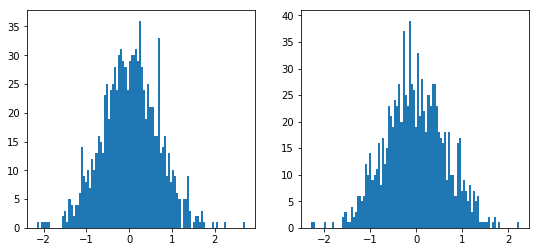

In [74]:
count = 1000
x0 = np.array([uniform(0,1) for i in range(count)])
x1 = np.array([uniform(0,1) for i in range(count)])

z0 = np.sqrt(-2.0*np.log10(x0))*np.cos(2*np.pi*x1)
z1 = np.sqrt(-2.0*np.log10(x0))*np.sin(2*np.pi*x1)
plt.figure(figsize=(9,4))
plt.subplot(121)
plt.hist(z0, 100)
plt.subplot(122)
plt.hist(z1, 100)
plt.show()

# MCMC算法
统计学中经常会遇到复杂分布的加和或积分的问题，抽样（Sampling）可以模拟不可观测变量的分布。MCMC抽样方法的出现使得贝叶斯方法变得实用，因为之前不可观测变量（包括隐变量和参数）的后验分布积分求解非常困难。

## 马尔可夫链
在讲MCMC方法之前，首先介绍一下马尔可夫链（简称马氏链），其数学定义：$P(X_{t+1}=x|X_t,X_{t-1},...)=P(X_{t+1}=x|X_t)$。也就是说，当前状态只与前一个状态有关，与其他状态无关。马氏链体现的是状态空间的转换关系，下一个状态只决定于当前的状态。

我们先来对马尔可夫链有个直观的认识。这里假设$f(t)$是一个时间序列，马尔可夫链是假设$f(t+1)$只与$f(t)$有关的随机过程。

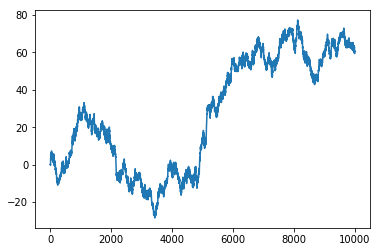

In [89]:
counts = 10000
signal = [0.0]
for i in range(counts):
    # random select one offset (from [-1,1]) to signal[i-1]  
    signal.append(signal[-1]+random.uniform(-1,1))
    
plt.plot(signal)
plt.show()

马尔科夫链的二维扩展版就是常见的__随机游走（Random Walk）__，比如布朗运动等。

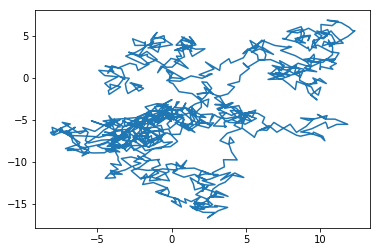

In [91]:
counts = 1000
x,y = [0], [0]

for i in range(counts):
    x.append(x[-1]+random.uniform(-1,1))
    y.append(y[-1]+random.uniform(-1,1))
    
plt.plot(x, y)
plt.show()

### 离散空间下的马尔可夫链

再举个例子，社会学家经常把人按其经济状况分成3类：下层（lower-class）、中层（middle-class）、上层（upper-class），这里采用1，2，3分别代表这三个阶层。社会学家们发现决定一个人收入阶层的最重要因素是其父母的收入阶层：如果一个人的收入属于下层类别，那么他的孩子属于下层收入的概率是0.65, 属于中层收入的概率是0.28, 属于上层收入的概率是0.07。假设从父代到子代，收入阶层的变化转移概率如下：

state |   1  |   2  | 3
------|:-----:|:-----:|:----:
1    |  0.65 |  0.28 | 0.07
2    |  0.15 |  0.67 | 0.18
3    |  0.12 |  0.36 | 0.52

使用矩阵的表示方式，转移概率矩阵记为：  
$$
  P=\left[\begin{matrix}
  0.65 & 0.28 & 0.07 \\
  0.15 & 0.67 & 0.18 \\
  0.12 & 0.36 & 0.52 \\
  \end{matrix}
  \right]
$$

假设当前一代人处于不同阶层的人的比例是概率分布向量$\pi_0=[\pi_0(1),\pi_0(2),\pi_0(3)]$，那么他们子女处于不同阶层的分布比例将是$\pi_1,=\pi_0 P$，他们的孙子一代处于不同阶层的比例将是$\pi_2=\pi_1 P=\pi_0 P^2$，而第n代的子孙处于不同阶层的分布比例将是$\pi_n=\pi_{n-1}P=\pi_{n-2}P^2=...=\pi_0 P^n$。假设初始的概率分布$\pi_0=[0.21,0.68,0.11]$，则我们可以计算前n代人的分布状况。 

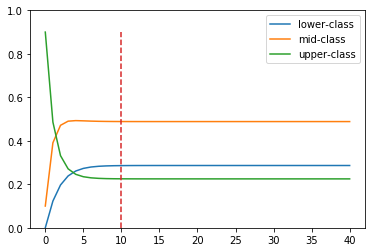

transform matrix after several transfer:
 [[ 0.28650138  0.48852158  0.22497704]
 [ 0.28650138  0.48852158  0.22497704]
 [ 0.28650138  0.48852158  0.22497704]]


In [120]:
init_stat=np.array([[0,0.1,0.9]])
trans_stat = np.array([[0.65,0.28,0.07],
                       [0.15,0.67,0.18],
                      [0.12,0.36,0.52]])
cur_stat = init_stat
ntrans = trans_stat
status = [init_stat]
for i in range(40):
    cur_stat = np.dot(cur_stat, trans_stat)
    ntrans = np.dot(ntrans, trans_stat)
    status.append(cur_stat)
status = np.row_stack(status)
plt.ylim([0,1])
plt.plot(range(status.shape[0]), status[:,0], label='lower-class')
plt.plot(range(status.shape[0]), status[:,1], label='mid-class')
plt.plot(range(status.shape[0]), status[:,2], label='upper-class')
plt.plot([10,10],[0,.9], '--')
plt.legend()
plt.show()
print('transform matrix after several transfer:\n', ntrans)

可以看到从第8代人开始，这个分布就基本上稳定不变了；而且$P^n$在n足够大的情况下，每一行也趋向于收敛于某个概率分布。事实上，从任意初始概率分布开始，状态都会收敛到上面的稳定结果。
> __马氏链定理：__如果一个非周期马氏链具有转移概率矩阵P，且它的任何两个状态是连通的，那么$\lim_{n\to \infty}P_{ij}^n=\pi(j)$，我们有：
>
$$
    \lim_{n\to\infty}P^n=\left[\begin{matrix}
                \pi(1) & \pi(2) & \cdots & \pi(j) & \cdots \\
                \pi(1) & \pi(2) & \cdots & \pi(j) & \cdots \\
                \vdots & \vdots & \ddots & \vdots & \vdots \\
                \pi(1) & \pi(2) & \cdots & \pi(j) & \cdots \\
                \end{matrix}\right]
$$
>
>其中，$\pi(j)=\sum_{i=0}^\infty{\pi(i)P_{ij}}$。  
>若$\pi=[\pi(1),\pi(2),\cdots,\pi(j),\cdots]$，$\pi$是方程$\pi P=\pi$的唯一非负解。
>则$\pi$称为马氏链的平衡分布。

>__注__：定理要求图是联通的（没有孤立点），同时不存在一个联通子图没有对外的出边（就像黑洞一样）。

这个马氏链的收敛定理非常重要，MCMC(Markov Chain Monte Carlo) 方法都是以这个定理作为理论基础的。

假设我们从初始概率分布$\pi_0$出发，我们在马氏链上做状态转移，记$X_i$的概率分布为$\pi_i$，则有：  
$X_0\sim \pi_0(x),$  
$X_i\sim \pi_i(x),\ \pi_i(x)=\pi_{i-1}(x)P=\cdots=\pi_0(x)P^n$  
由马氏链收敛定理可知，概率分布$\pi_i(x)$将收敛到平稳分布$\pi(x)$。假设到第$n$步的时候马氏链收敛，则有：
$$
\begin{matrix}
X_0\sim \pi_0(x) \\  
X_1\sim \pi_1(x) \\
X_2\sim \pi_2(x) \\
\vdots \\
X_n\sim \pi_n(x)=\pi(x) \\
X_{n+1}\sim \pi_{n+1}(x)=\pi(x) \\
X_{n+2}\sim \pi_{n+2}(x)=\pi(x) \\
\vdots
\end{matrix}
$$
所以$X_n,X_{n+1},X_{n+2},\cdots\sim\pi(x)$都是同分布的随机变量，显然他们并不独立。如果我们从一个具体的初始状态$x_0$开始，沿着马氏链按照概率转移矩阵做跳转，可以得到一个转移序列$x_0,x_1,x_2,\cdots,x_n,x_{n+1},\cdots$，由于马氏链的收敛性质可知，$x_n,x_{n+1},x_{n+2},\cdots$都将是平稳分布$\pi(x)$的样本。 

### 连续空间下的马尔可夫链
对于连续分布，状态转移操作是无法用矩阵表示的，而是采用连续函数表示。我们采用一个实例来说明连续空间下的马氏链，实例中的状态转移操作采用均值为0到当前状态的1/2、方差为1的正态分布；采用标准正态分布进行初始化。  
为了使得马氏链远离初始条件，并保证生成的数据来自于稳定的数据分布，我们选择丢弃前50个状态值。我们也可以多个链同时生成，从而保证生成的数据更加密集，我们这里同时进行5条不同链的生成。

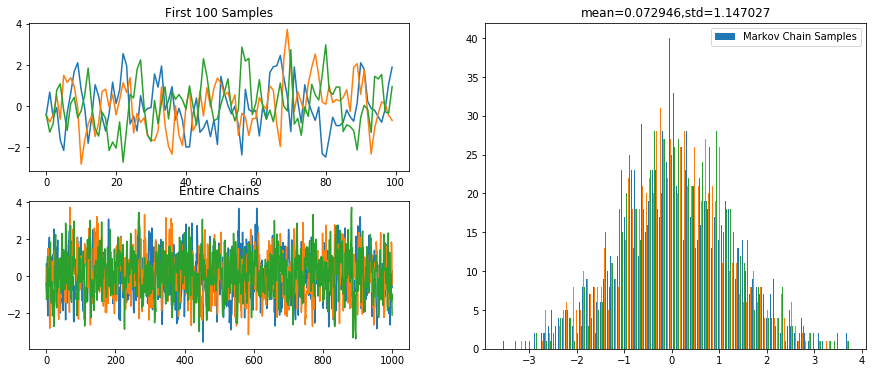

In [139]:
count = 1000
chain_count = 3
burnin_count = 50
x = np.zeros((count,chain_count))
x[0] = stats.norm.rvs()
for i in range(1, count):
    x[i] = stats.norm(loc=x[i-1]*.5).rvs(size=chain_count)

plt.figure(figsize=(15,6))
plt.subplot(221)
plt.title('First 100 Samples')
plt.plot(x[:100,:])
plt.subplot(223)
plt.title('Entire Chains')
plt.plot(x)
plt.subplot(122)
plt.title('mean=%f,std=%f' % (np.mean(x[:]), np.std(x[:])))
plt.hist(x[burnin_count:,:], bins=100, label='Markov Chain Samples')
plt.legend()
plt.show()

上图中左上角是前100个样本数据的展示，左下角是所有样本数据的展示，右图可以看出MC模拟的数据分布应该是正态分布，均值为0，方差为1.15。

## Metropolis采样
MCMC（Markov Chain Monte Carlo，马尔可夫链-蒙特卡洛方法）抽样的目的：给定一个已知的概率分布函数$p(x)$，对随机变量$x$进行采样，使其满足$p(x)$概率分布。

由于马氏链能够收敛到平稳分布，于是一个很漂亮的想法是：如果我们能构造一个转移矩阵为P的马氏链，使得该马氏链的平稳分布恰好是p(x), 那么我们从任何一个初始状态$x_0$出发沿着马氏链转移, 得到一个转移序列$x_0,x_1,x_2,...,x_n,x_{n+1},...$，如果马氏链在第n步已经收敛了，于是我们就得到了$\pi(x)$的样本$x_n,x_{n+1}$。
>这个绝妙的想法在1953年被Metropolis想到了，为了研究粒子系统的平稳性质，Metropolis考虑了物理学中常见的波尔兹曼分布的采样问题，首次提出了基于马氏链的蒙特卡罗方法，即Metropolis算法，并在最早的计算机上编程实现。Metropolis算法是__首个普适的采样方法__，并启发了一系列MCMC方法，所以人们把它视为随机模拟技术腾飞的起点。 Metropolis的这篇论文被收录在《统计学中的重大突破》中，Metropolis算法也被遴选为二十世纪的十个最重要的算法之一。  

按照上一小节的例子和定理可知，我们可以采用马尔可夫链的转移策略。随机初始化状态值$x_0\sim \pi_0$，算法从建议分布（Proposal Distribution）$q(x|x_{t-1}$中获取可能的样本$x^*$。类似于传统马尔可夫链的转移性质，建议分布仅依赖于链的上一个状态值。但在Metropolis算法中，转移策略中增加了额外的步骤：判断目标分布是否有足够的可能性符合建议的状态值，从而保证建议的状态值是给出的概率分布抽样，并将其设置为马氏链的下一个状态值。如果$p(x)$的概率密度和建议的状态值相差较大，则很有可能被拒绝（但并不保证一定拒绝）。接受和拒绝建议状态值的规则采用启发式的方法如下：
> 1. 如果$p(x^*)\geq p(x_{t-1})$，则接受建议的状态值$x^*$并将其作为马氏链的下一个状态。  
> 2. 如果$p(x^*)<p(x_{t-1})$，则表示$p(x)$在$x^*$附近具有较低的概率密度，这时建议的状态值同样可能被接受，但不是随机接受，而是在$\frac{p(x^*)}{p(x_{t-1})}$概率下接受建议状态值。  

上述启发式方法可以通过计算建议状态值$\alpha$的接受概率进行实现，即：
$$\alpha=min(1,\frac{p(x^*)}{p(x_{t-1}})$$

根据接受概率的概念，Metropolis抽样算法的转移操作原理如下：如果随机数$u$小于等于$\alpha$，则接受建议状态值$x^*$（如启发式方法中步骤1所示）；否则，拒绝样本$x^*$并继续建议下一个新的状态值。假设我们希望获取$M$个样本，则Metropolis抽样算法的步骤如下：
> 1. 设置$t=0$
> 2. 从一个先验分布$\pi_0$生成一个初始状态值$x_0$
> 3. 重复以下步骤直到$t=M$  
> 　　　　设置$t=t+1$  
> 　　　　从建议分布$q(x|x_{(t-1)})$中生成建议状态值$x^*$  
> 　　　　计算接受概率$\alpha=min(1,\frac{p(x^*)}{p(x_{t-1})})$  
> 　　　　从均匀分布$Unif(0,1)$中产生一个随机数$u$  
> 　　　　　　　　如果$u\leq \alpha$，接受建议状态值并设置$x_t=x^*$  
> 　　　　　　　　否则设置$x_t=x_{t-1}$

接下来我们采用Metropolis算法对一个未知分布进行采样。假设我们要采样的分布：
$$p(x)\sim \frac{e^{-x+2}}{(1+e^{-x+2})^2}$$

采用Metropolis算法进行采样，我们需要定义：1)马氏链初始状态的先验概率分布$\pi^{(0)}$；2)Proposal分布$q(x|x^{(t-1})$。比如我们定义：
$$\pi^{(0)}\sim N(0,1)$$
$$q(x|x^{(t-1)})\sim N(x^{(t-1)},1)$$

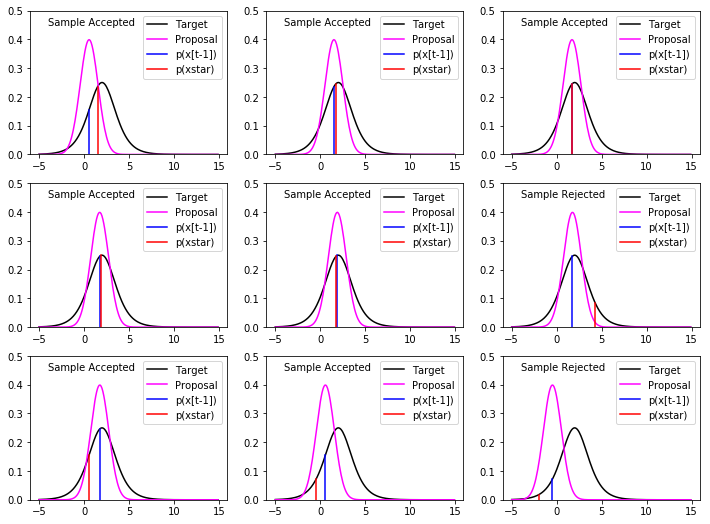

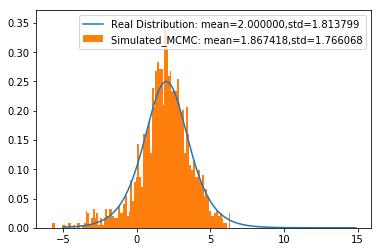

In [168]:
def target_distr(x):    
    return stats.logistic(loc=2.).pdf(x)

def metropolis(counts, xmm):    
    status = np.zeros(counts)
    status[0] = stats.norm.rvs()
    plt.figure(figsize=(12,9))
    for i in range(1, counts):
        xstar = stats.norm(loc=status[i-1]).rvs()
        proposal = stats.norm(loc=status[i-1]).pdf(xmm)
        ap = target_distr(xstar) / target_distr(status[i-1])
        if random.uniform(0,1) < np.min([1,ap]):
            status[i] = xstar
            str_status = 'Sample Accepted'
        else:
            status[i] = status[i-1]
            str_status = 'Sample Rejected'
        
        if i > 10 and i < 20:
            plt.subplot(330+i-10)
            plt.ylim([0.,.5])
            plt.plot(xmm, target_distr(xmm), color='black', label="Target")
            plt.plot(xmm, proposal,color='magenta', label="Proposal")
            plt.plot([status[i-1], status[i-1]], [0, target_distr(status[i-1])], color='blue', label='p(x[t-1])')
            plt.plot([xstar, xstar], [0, target_distr(xstar)],color='red', label='p(xstar)')
            plt.text(-4, 0.45, str_status)
            plt.legend()
    plt.show()
    return status

xmm = np.arange(-5,15,.1)
status = metropolis(5000, xmm)

plt.plot(xmm, target_distr(xmm), label="Real Distribution: mean=%f,std=%f" %
        (stats.logistic(loc=2.).mean(),stats.logistic(loc=2.).std()))
plt.hist(status[-2000:],normed=True, bins=100, label="Simulated_MCMC: mean=%f,std=%f" % 
         (np.mean(status[-2000:]), np.std(status[-2000:]))) # histtype='step'
plt.legend()
plt.show()

如上图所示，我们对中间的9次迭代进行了可视化，其中黑色曲线表示目标分布$p(x)$，品红色曲线表示建议分布$q(x|x_{t-1})$，蓝色的竖直线表示$p(x_{t-1})$的值，红色竖直线则表示$p(x^*)$的值。每次迭代，如果红色线比蓝色线长，则接受抽样样本$x^*$，并将建议分布的中心平移接受样本。如果蓝色线比红色线长，则随机接受或拒绝样本。  
但是，为什么要随机保留“不好”的建议样本呢？这是因为实验结果表明，这样能够让马氏链时不时地访问到目标分布中低概率的状态值。这种操作能够满足我们想要从整个目标分布中（包括尾部）得到充足样本的需求。

Metropolis算法有个非常好的性质，就是目标分布$p(x)$不需要必须是完全归一化的概率分布，这是由于接受概率是基于目标分布中两个值的比率计算的。假设$p(x)$是一个非正态分布，而分布
$$p^*(x)=\frac{p(x)}{Z}$$
是一个归一化的概率分布，其中$Z$表示归一化常数，则：
$$p(x)=Zp^*(x)$$
接受率$\alpha$的计算如下：
$$\alpha=\frac{p(a)}{p(b)}=\frac{Zp^*(a)}{Zp^*(a)}=\frac{p^*(a)}{p^*(b)}$$
归一化常数$Z$消掉了，这个性质在贝叶斯方法中很难确定分布的归一化常数时非常有用。

__转移算子的可逆性__

为了保证马氏链能够收敛到稳定的概率分布，转移算子需要满足一定的约束条件，也就是$x_t\rightarrow x_{t+1}$转移的概率必须等于其逆转移$x_{t+1}\rightarrow x_t$的概率。转移算子的可逆性一般和__细致平衡条件（Detailed Balance Condition）__有关。
>__定理：__如果__非周期马氏链__的转移矩阵P和分布$\pi(x)$对于所有的$i,j$满足$\pi(i)P_{ij}=\pi(j)P_{ji}$，则$\pi(x)$是马氏链的平衡分布，上式被称为__细致平衡条件（Detailed Balance Condition）__。

对于Metropolis抽样方法，如果分布$q(x|x_{t-1})$是对称的，就可以保证转移算子的可逆性，对称的概率分布如：正态分布、柯西分布、Student's-t分布以及均匀分布等。

但是，只采用对称的建议分布理论上无法满足所有可能的目标概率分布。比如如果目标分布的定义域为$0\leq x\leq \infty$，一般会采用相同定义域下的建议分布，也就是一个非对称的概率分布。这也是Metropolis-Hasting抽样方法提出的原因，主要针对接收概率进行改进，从而可以采用非对称的建议概率分布。

## Metropolis-Hasting采样
Metropolis采样方法要求建议分布$p(x^*|x_{t-1})$必须是对称的，这在很多情况下（比如定义域在$(0,\infty)$的情况）是不适合的。因此，为了能够使用非对称的建议分布函数，Metropolis-Hasting抽样方法实现了一个根据建议分布定义的校正系数$c$：
$$c=\frac{q(x_{t-1}|x^*)}{q(x^*|x_{t-1})}$$
校正系数对转移算子进行调整，从而保证任何建议概率分布下都能够满足$x_t\rightarrow x_{t+1}$转移的概率等于其逆转移$x_{t+1}\rightarrow x_t$的概率。

Metropolis-Hasting抽样方法的实现和Metropolis抽样方法本质上是一样的，除了增加了一个校正因子用于评估接受概率$\alpha$。采用Metropolis-Hasting抽样方法获取M个样本的具体步骤如下：
> 1. 设置$t=0$
> 2. 从一个先验分布$\pi_0$生成一个初始状态值$x_0$
> 3. 重复以下步骤直到$t=M$  
> 　　　　设置$t=t+1$  
> 　　　　从建议分布$q(x|x_{t-1})$中生成建议状态值$x^*$  
> 　　　　计算建议分布的校正因子$c=\frac{q(x_{t-1}|x^*)}{q(x^*|x_{t-1}}$  
> 　　　　计算接受概率$\alpha=min(1,\frac{p(x^*)}{p(x_{t-1})}\times c)$  
> 　　　　从均匀分布$Unif(0,1)$中产生一个随机数$u$  
> 　　　　　　　　如果$u\leq \alpha$，接受建议状态值并设置$x_t=x^*$  
> 　　　　　　　　否则设置$x_t=x_{t-1}$

很多时候可以将Metropolis抽样方法看作是Metropolis-Hasting抽样方法的泛化，因为当建议分布是对称概率分布时，校正因子等于1，这里的Metropolis-Hasting抽样方法就等同于Metropolis抽样方法。

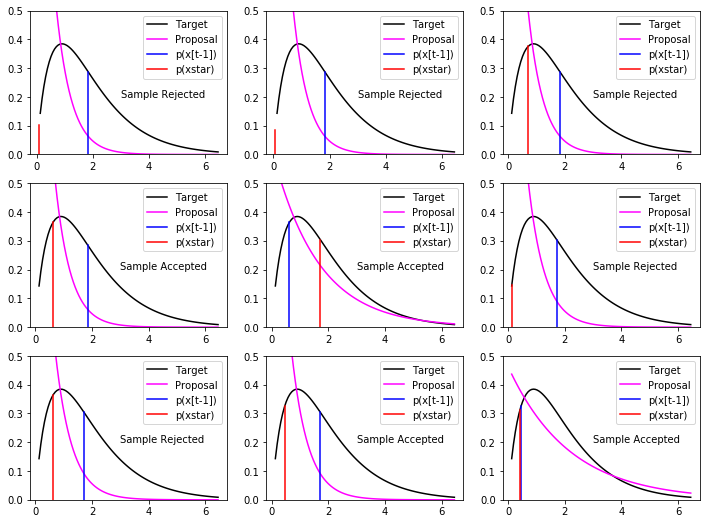

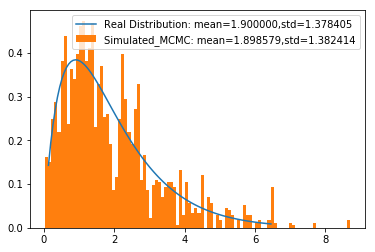

In [194]:
def target_pdf(x, a=1.9):    
    return stats.gamma.pdf(x, a)

def target_rvs(a=1.9):
    return stats.gamma(a).rvs()

def proposal_pdf(x, mu=5):
    return stats.expon(scale=1/mu).pdf(x)

def proposal_rvs(mu=5):
    return stats.expon(scale=1/mu).rvs()

def metropolis(counts, xmm):    
    status = np.zeros(counts)
    status[0] = stats.expon.rvs()
    plt.figure(figsize=(12,9))
    for i in range(1, counts):
        xstar = proposal_rvs(status[i-1])
        c = proposal_pdf(status[i-1],xstar)/proposal_pdf(xstar, status[i-1])
        
        proposal = proposal_pdf(xmm, status[i-1])
        ap = target_pdf(xstar) / target_pdf(status[i-1]) * c
        if random.uniform(0,1) < np.min([1,ap]):
            status[i] = xstar
            str_status = 'Sample Accepted'
        else:
            status[i] = status[i-1]
            str_status = 'Sample Rejected'
        
        if i > 10 and i < 20:
            plt.subplot(330+i-10)
            plt.ylim([0.,.5])
            plt.plot(xmm, target_pdf(xmm), color='black', label="Target")
            plt.plot(xmm, proposal,color='magenta', label="Proposal")
            plt.plot([status[i-1], status[i-1]], [0, target_pdf(status[i-1])], color='blue', label='p(x[t-1])')
            plt.plot([xstar, xstar], [0, target_pdf(xstar)],color='red', label='p(xstar)')
            plt.text(3, .2, str_status)
            plt.legend()
    plt.show()
    return status

a = 1.9
xmm = np.linspace(stats.gamma.ppf(0.01, a), stats.gamma.ppf(0.99, a), 100)
status = metropolis(5000, xmm)
plt.plot(xmm, target_pdf(xmm), label="Real Distribution: mean=%f,std=%f" %
        (stats.gamma(a).mean(), stats.gamma(a).std()))
plt.hist(status[-2000:],normed=True, bins=100, label="Simulated_MCMC: mean=%f,std=%f" % 
         (np.mean(status[-2000:]), np.std(status[-2000:]))) # histtype='step'
plt.legend()
plt.show()

## Gibbs采样
上述方法理论上可以模拟任何概率分布的抽样，但是由于接受率$\alpha$的存在，上述Metropolis-Hasting算法在高维的情况下效率不够高。如果可以找到一个转移矩阵$Q$使得接受率$\alpha=1$，就能够解决转移过程中接受率的问题。我们先以二维的情况为例，假设一个概率分布$p(x,y)$，有两个$x$坐标相同的点$A(x_1,y_1),B(x_1,y_2)$，我们发现：
$$p(x_1,y_1)p(y_2|x_1)=p(x_1)p(y_1|x_1)p(y_2|x_1)$$
$$p(x_1,y_2)p(y_1|x_1)=p(x_1)p(y_2|x_1)p(y_1|x_1)$$
可以得出：
$$p(x_1,y_1)p(y_2|x_1)=p(x_1,y_2)p(y_1|x_1)$$
即：
$$p(A)p(y_2|x_1)=p(B)p(y_1|x_1)$$

基于上述等式可知，在$x=x_1$这条$y$轴的平行线上，如果使用条件分布$p(y|x)$作为任意两点之间的转移概率，那么任意两点之间的转移满足细致平稳条件。同样地，如果在$x$轴的平行线$y=y_1$上任意取两点$A(x_1,y_1),C(x_2,y_1)$，也有如下等式成立：
$$p(A)p(x_2|y_1)=p(C)p(x_1|y_1)$$
![Gibbs sampling transition](https://raw.githubusercontent.com/qikunlun/ML-course/master/images/gibbs-transition.png)

### 二维Gibbs采样
于是我们可以构造平面上任意两点之间的转移概率矩阵$Q$：
$$
\begin{align*}
& Q(A\rightarrow B)=p(y_B|x_1)\ & if\ x_A=x_B=x_1 \\
& Q(A\rightarrow C)=p(x_C|y_1)\ & if\ y_A=y_C=y_1 \\
& Q(A\rightarrow D)=0\ &\ otherwise
\end{align*}
$$
举一个简单的例子。假设我们需要模拟的变量维度分别是性别（男性或女性）和居住地（城市或农村），迁移矩阵记为$Q$，概率分布记为$p$，那么$Q(男性农村人|男性城市人)=p(农村人|男性)$。

根据上述转移矩阵，可以验证对于平面上任意两点$X,Y$满足细致平稳条件：
$$p(X)p(X\rightarrow Y)=p(Y)p(Y\rightarrow X)$$
则有二维空间上的马氏链收敛到平稳分布$p(x,y)$。这个算法就是Gibbs采样算法，是 Stuart Geman 和 Donald Geman 这两兄弟于 1984 年提出来的，之所以叫做 Gibbs Sampling 是因为他们研究了 Gibbs random field，这个算法在现代贝叶斯分析中占据重要位置。二维Gibbs采样算法抽取$M$个样本的具体流程如下：
> 1. 随机初始化状态$x_0,y_0$  
> 2. 重复以下步骤直到$t=M$  
>　　　从条件概率分布$p(y|x_t)$中采样得到$y_{t+1}$，即$y_{t+1}\sim p(y|x_t)$  
>　　　从条件概率分布$p(x|y_{t+1})$中采样得到$x_{t+1})$，即$x_{t+1}\sim p(x|y_{t+1})$

假设我们从状态K开始保留M-K个样本作为我们需要的平稳分布对应的样本集，即：
$${(x_K,y_K),(x_{K+1},y_{K+1}),...,(x_M,y_M)}$$
整个采样的过程如下图中蓝色线所示，即：
$$(x_1,y_1)\rightarrow (x_1,y_2)\rightarrow (x_2,y_2)\rightarrow (x_2,y_3)\rightarrow\cdots\rightarrow (x_M,y_M)$$

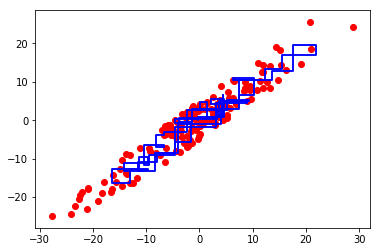

In [220]:
trans_x,trans_y = [],[]
x, y=[random.uniform(-5,5)],[random.uniform(-2,2)]

for i in range(200):
    y.append(random.uniform(-5,5)+x[-1])
    trans_x.append((x[-1],x[-1]))
    trans_y.append((y[-2],y[-1]))
    x.append(random.uniform(-5,5)+y[-1])
    trans_x.append((x[-2],x[-1]))
    trans_y.append((y[-1],y[-1]))

burnin=50
plt.plot(trans_x[:burnin*2],trans_y[:burnin*2],color='b')
plt.scatter(x[burnin:],y[burnin:],color='r')
plt.show()

###  多维Gibbs采样
上述算法扩展到多维空间下也是成立的，例如一个n维的概率分布$(x_1,x_2,\cdots,x_n)$，我们可以通过在n个坐标中进行轮换采样得到新的样本。对于轮换到的任意一个坐标轴$x_i$上的转移，马氏链的状态转移概率$p(x_i|x_1,x_2,\cdots,x_n)$，即固定其他的$n-1$个坐标轴，在坐标轴$x_i$上移动。具体的多维Gibbs采样算法如下：  
> 1. 随机初始化状态$x_1^1,x_2^1,\cdots,x_n^1$  
> 2. 重复以下步骤直到$t=M$  
>　　　从条件概率分布$p(x_1^t|x_2^t,x_3^t,\cdots,x_n^t)$中采样得到$x_1^{t+1}$，即$x_1^{t+1}\sim p(x_1^t|x_2^t,x_3^t,\cdots,x_n^t)$  
>　　　从条件概率分布$p(x_2^t|x_1^{t+1},x_3^t,\cdots,x_n^t)$中采样得到$x_2^{t+1}$，即$x_2^{t+1}\sim p(x_2^t|x_1^{t+1},x_3^t,\cdots,x_n^t)$  
>　　　$\cdots$  
>　　　从条件概率分布$p(x_j^t|x_1^{t+1},x_2^{t+1}\cdots,c_{j+1}^t,\cdots,x_n^t)$中采样得到$x_j^{t+1}$，即$x_j^{t+1}\sim p(x_j^t|x_1^{t+1},x_2^{t+1}\cdots,c_{j+1}^t,\cdots,x_n^t)$  
>　　　$\cdots$  
>　　　从条件概率分布$p(x_n^t|x_1^{t+1},x_2^{t+1},\cdots,x_{n-1}^{t+1})$中采样得到$x_n^{t+1}$，即$x_n^{t+1}\sim p(x_n^t|x_1^{t+1},x_2^{t+1},\cdots,x_{n-1}^{t+1})$  

我们从K个样本开始保留作为平稳分布的样本集，即：
$$(x_1^K,x_2^K,\cdots,x_n^K),\cdots,(x_1^M,x_2^M,\cdots,x_n^M)$$

### Gibbs抽样实例
我们用Gibbs Sampling来模拟一下二维正态分布。二维正态分布的两个维度本身就是正态分布，假设$x_1\sim N(\mu_1,\sigma_1),x_2\sim N(\mu_2,\sigma_2)$，$x_1$和$x_2$的相关系数为$\rho$，即二维正态分布$N(\mu_1,\mu_2,\sigma_1,\sigma_2,\rho)$的采样为例解释Gibbs采样，采样过程中的状态转移条件分布为（参考[Penn State University STAT414 online course](https://onlinecourses.science.psu.edu/stat414/node/118)）：
$$p(x_1|x_2)=N\left(\mu_1+\rho\sigma_1/\sigma_2(x_2-\mu_2),(1-\rho^2)\sigma_1^2\right)$$
$$p(x_2|x_1)=N\left(\mu_2+\rho\sigma_2/\sigma_1(x_1-\mu_1),(1-\rho^1)\sigma_2^2\right)$$

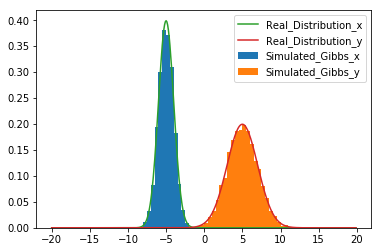

In [7]:
import pylab as pl
import numpy as np
import math

mean_x,mean_y = -5,5
std_x,std_y = 1,2
rho = 0.5 # x1和y1的相关系数

# x维度的概率密度函数
def pdf_gaussian_x(x):
    return stats.norm(loc=mean_x,scale=std_x).pdf(x)

def pdf_gaussian_y(y):
    return stats.norm(loc=mean_y,scale=std_y).pdf(y)

# 条件分布 p(x|y) 对应上述p(x1|x2)
def pxgiveny(y):
    mu = mean_x+(y-mean_y)*(std_x/std_y)*rho
    std = std_x * np.sqrt(1-rho**2)
    return stats.norm(loc=mu, scale=std).rvs()
   
# 条件分布 p(y|x) 对应上述p(x2|x1)
def pygivenx(x):
    mu = mean_y+(x-mean_x)*(std_y/std_x)*rho
    std = std_y * np.sqrt(1-rho**2)
    return stats.norm(loc=mu, scale=std).rvs()

def gibbs(N_hop):

    x_states = []
    y_states = []
    
    #状态随机初始化
    x = np.random.uniform()
    y = np.random.uniform()
    
    for _ in range(N_hop):        
        x = pxgiveny(y) #根据y采样x
        y = pygivenx(x) #根据x采样y
        x_states.append(x)
        y_states.append(y)

    return x_states[-5000:], y_states[-5000:]

x_sim, y_sim = gibbs(10000)

vmm = np.arange(-20, 20, .5)
pl.hist(x_sim, normed=True, bins=vmm, label="Simulated_Gibbs_x")
pl.hist(y_sim, normed=True, bins=vmm, label="Simulated_Gibbs_y")

vmm = np.arange(-20, 20, 0.1)
pl.plot(vmm, pdf_gaussian_x(vmm), label="Real_Distribution_x")
pl.plot(vmm, pdf_gaussian_y(vmm), label="Real_Distribution_y")

pl.legend()
pl.show()

抽样的二维正态分布采样结果采用三维可视化的结果如下：

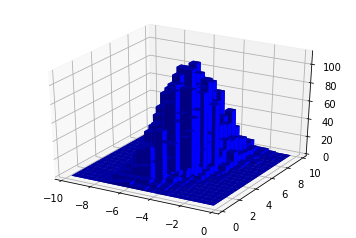

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xmm,ymm = np.arange(-10, 0, .5),np.arange(0, 10, .5)
hist, xedges, yedges = np.histogram2d(x_sim, y_sim, bins=[xmm,ymm])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

# Construct arrays with the dimensions for the 16 bars.
dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

plt.show()

由于Gibbs采样在高维特征时的优势，目前我们通常意义上的MCMC采样都是用的Gibbs采样。当然Gibbs采样是从M-H采样的基础上的进化而来的，同时Gibbs采样要求数据至少有两个维度，一维概率分布的采样是没法用Gibbs采样的,这时M-H采样仍然成立。 

# 参考
1. [A Brief Introduction to Markov Chains|The Clever Machine](https://theclevermachine.wordpress.com/2012/09/24/a-brief-introduction-to-markov-chains/)
2. [MCMC: The Metropolis Sampler](https://theclevermachine.wordpress.com/2012/10/05/mcmc-the-metropolis-sampler/)

2. [蒙特卡洛方法与定积分计算 | 统计之都](https://cosx.org/2010/03/monte-carlo-method-to-compute-integration)
2. [蒙特卡洛（Monte Carlo）法求定积分 - 白马负金羁 - CSDN博客](http://blog.csdn.net/baimafujinji/article/details/53869358)
3. [随机采样方法整理与讲解（MCMC、Gibbs Sampling等） - Bin的专栏 - 博客园](https://www.cnblogs.com/xbinworld/p/4266146.html)
4. [PRML读书会第十一章 Sampling Methods - CSDN博客](http://blog.csdn.net/nietzsche2015/article/details/43450855)
5. [MCMC（Markov Chain Monte Carlo）的理解与实践（Python）- CSDN博客](http://blog.csdn.net/lanchunhui/article/details/50452515)
6. [MC, MCMC, Gibbs采样 原理&实现（in R）- CSDN博客](http://blog.csdn.net/abcjennifer/article/details/25908495)
7. [从随机过程到马尔科夫链蒙特卡洛方法（MCMC）- 博客园](https://www.cnblogs.com/sddai/p/6144674.html)
8. [蒙特卡洛采样之拒绝采样（Reject Sampling）- CSDN博客](http://blog.csdn.net/baimafujinji/article/details/51407703)
9. [MCMC sampling for dummies](http://twiecki.github.io/blog/2015/11/10/mcmc-sampling/)